<a href="https://colab.research.google.com/github/ali-farshad/Homework1-ME5920/blob/main/2_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
import pandas as pd

df = pd.read_csv("energydata_complete.csv")
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [3]:
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date')

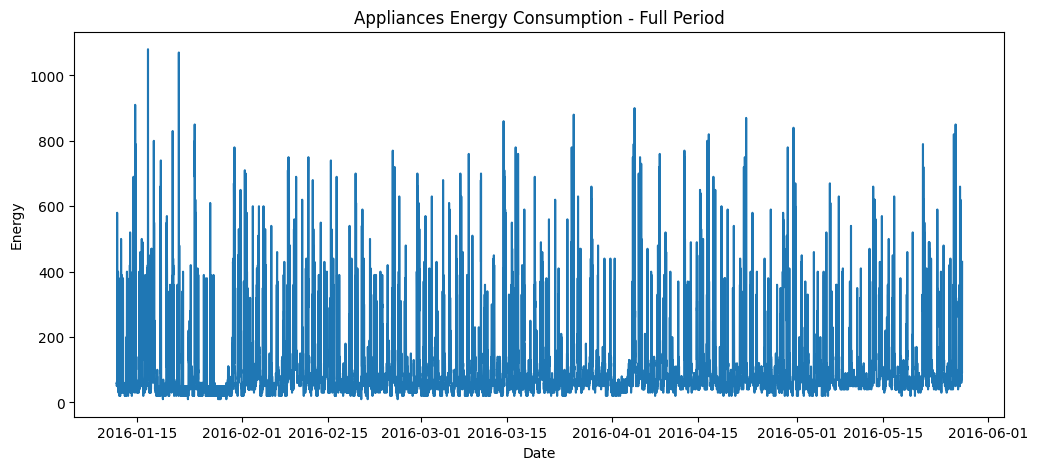

In [4]:
plt.figure(figsize=(12,5))
plt.plot(df['date'], df['Appliances'])
plt.title("Appliances Energy Consumption - Full Period")
plt.xlabel("Date")
plt.ylabel("Energy")
plt.show()

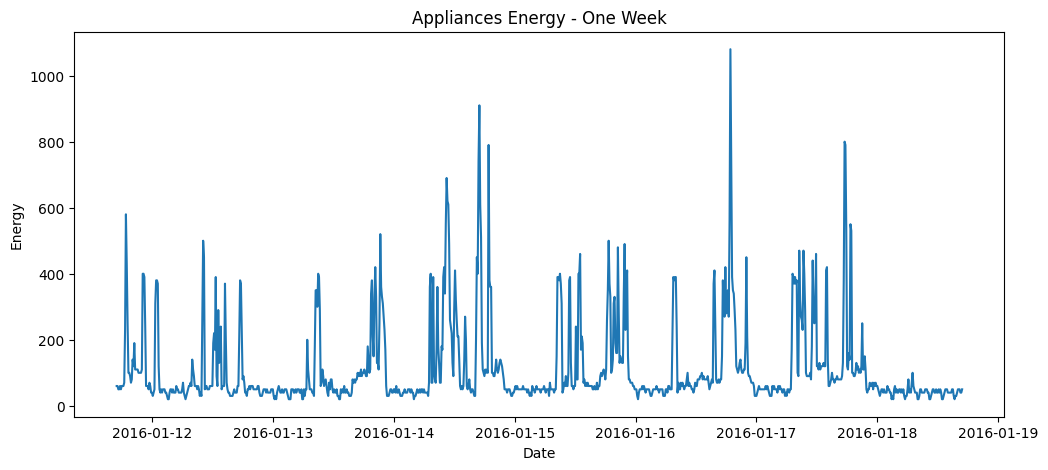

In [5]:
one_week = df.iloc[:7*24*6]

plt.figure(figsize=(12,5))
plt.plot(one_week['date'], one_week['Appliances'])
plt.title("Appliances Energy - One Week")
plt.xlabel("Date")
plt.ylabel("Energy")
plt.show()

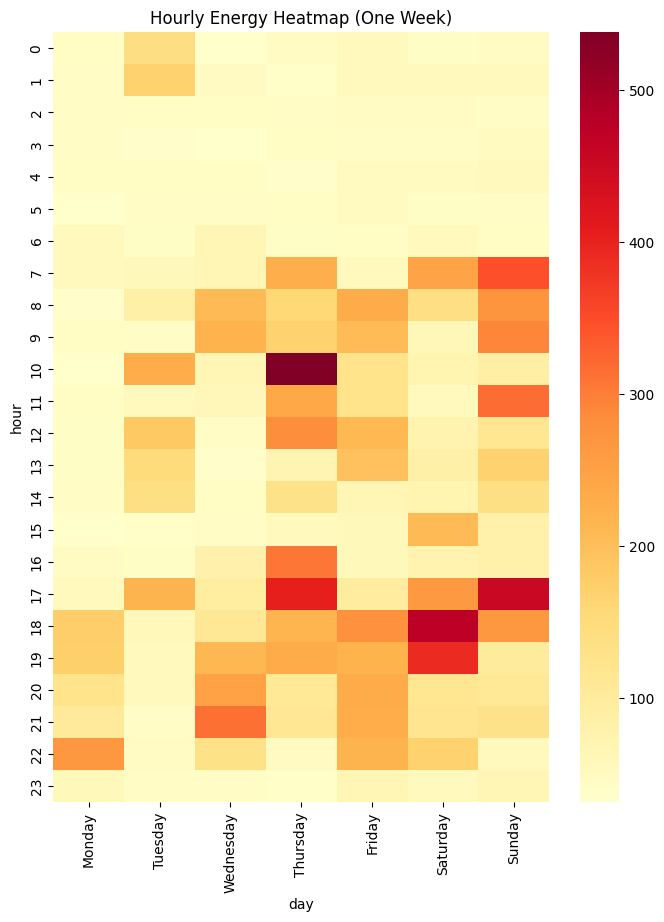

In [6]:
one_week = one_week.copy()
one_week['hour'] = one_week['date'].dt.hour
one_week['day'] = one_week['date'].dt.day_name()

hourly = one_week.groupby(['day','hour'])['Appliances'].mean().reset_index()
pivot = hourly.pivot(index='hour', columns='day', values='Appliances')
pivot = pivot[['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']]

plt.figure(figsize=(8,10))
sns.heatmap(pivot, cmap="YlOrRd")
plt.title("Hourly Energy Heatmap (One Week)")
plt.show()

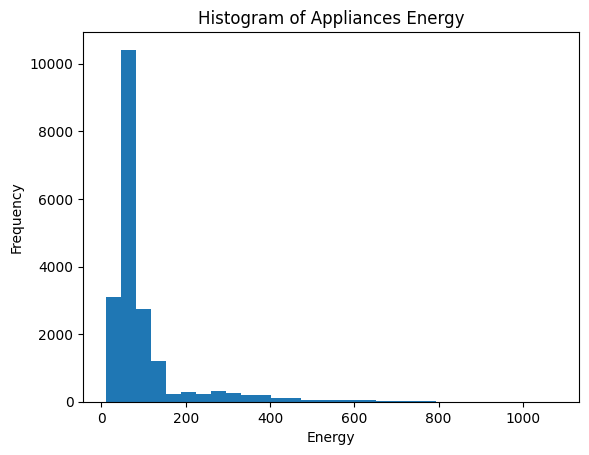

In [7]:
plt.figure()
plt.hist(df['Appliances'], bins=30)
plt.title("Histogram of Appliances Energy")
plt.xlabel("Energy")
plt.ylabel("Frequency")
plt.show()

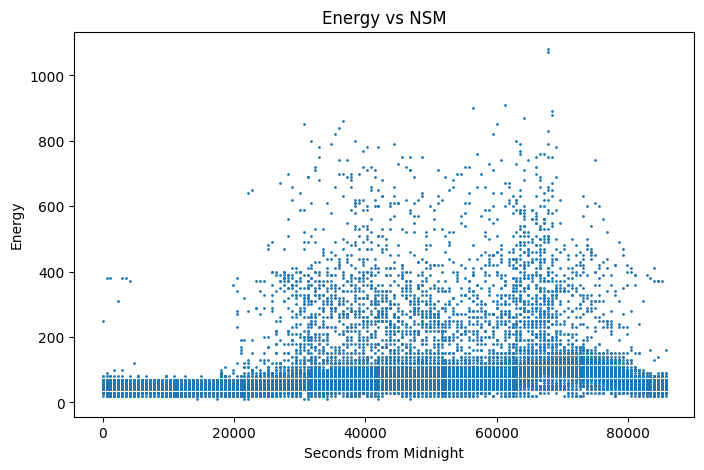

In [8]:
df['NSM'] = (
    df['date'].dt.hour * 3600 +
    df['date'].dt.minute * 60 +
    df['date'].dt.second
)

plt.figure(figsize=(8,5))
plt.scatter(df['NSM'], df['Appliances'], s=1)
plt.title("Energy vs NSM")
plt.xlabel("Seconds from Midnight")
plt.ylabel("Energy")
plt.show()

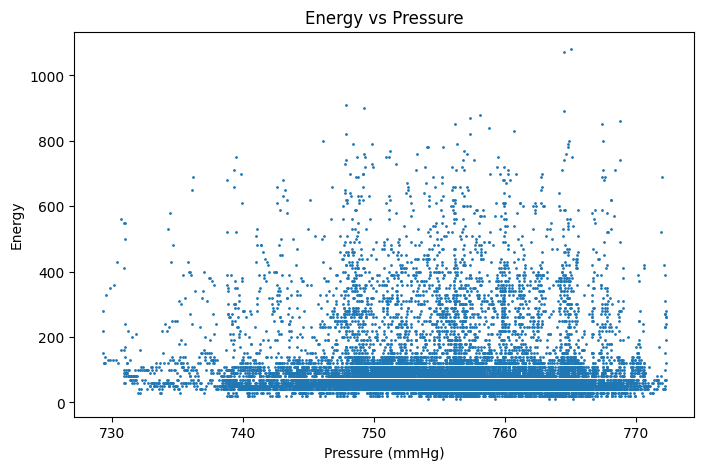

In [9]:
plt.figure(figsize=(8,5))
plt.scatter(df['Press_mm_hg'], df['Appliances'], s=1)
plt.title("Energy vs Pressure")
plt.xlabel("Pressure (mmHg)")
plt.ylabel("Energy")
plt.show()

Because human activities follow daily patterns (morning, afternoon, and evening usage), energy consumption is highly dependent on NSM. Thus, the time of day has a big impact on how much energy is used.
Weather and pressure are related. Weather has an impact on HVAC functioning and indoor temperature, which in turn affects how much energy appliances use.